# Load and Prepare Stock Data

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load multiple tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tickers, start='2020-01-01', end='2024-12-31')['Close']

# Drop missing values
data.dropna(inplace=True)

data.tail()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
2024-12-23  254.989655  225.059998  194.406113  434.379028  430.600006
2024-12-24  257.916443  229.050003  195.884399  438.450836  462.279999
2024-12-26  258.735504  227.050003  195.375000  437.233276  454.130005
2024-12-27  255.309296  223.750000  192.538254  429.668457  431.660004
2024-12-30  251.923019  221.300003  191.020004  423.979858  417.410004

# Compute Correlation Matrix

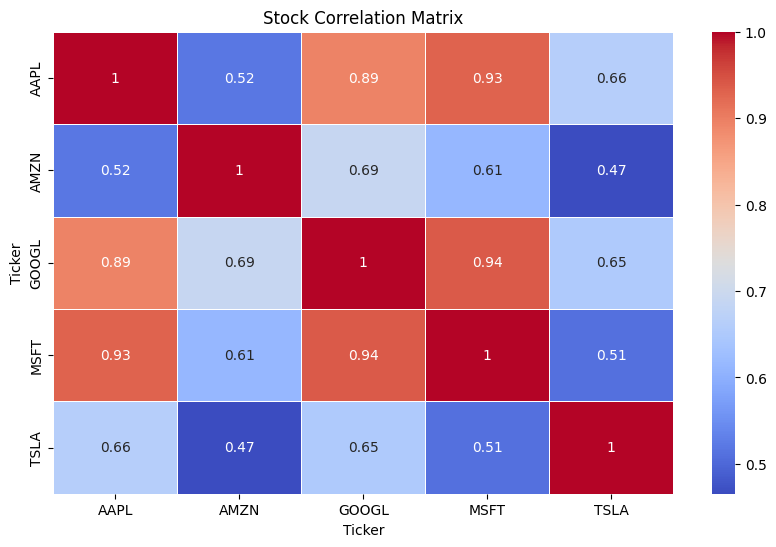

In [3]:
# Compute Pearson correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Stock Correlation Matrix')
plt.show()


# Rolling Correlation (Time-Varying Relationships)

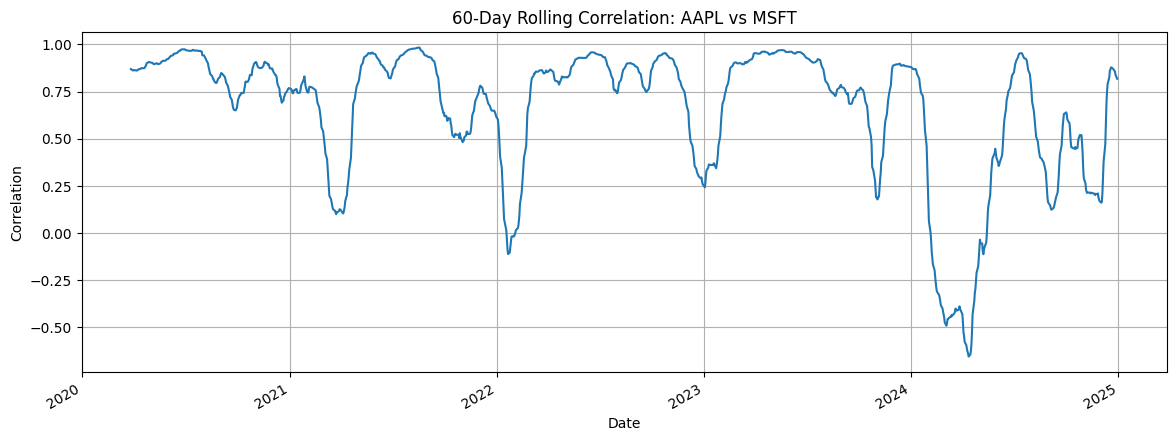

In [5]:
rolling_corr = data['AAPL'].rolling(window=60).corr(data['MSFT'])

# Plot
plt.figure(figsize=(14, 5))
rolling_corr.plot()
plt.title('60-Day Rolling Correlation: AAPL vs MSFT')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

# Correlation with a Market Index (e.g., S&P 500)

[*********************100%***********************]  1 of 1 completed


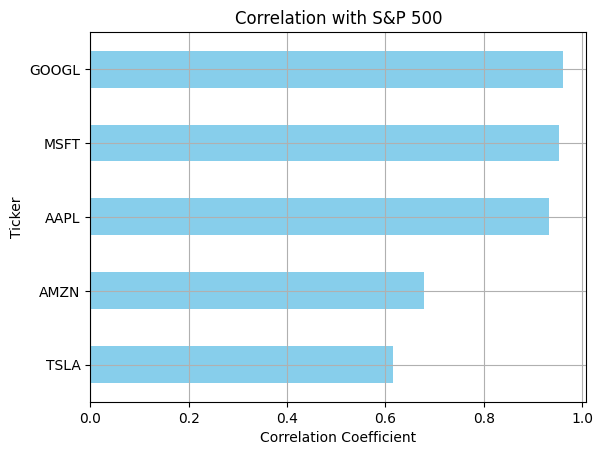

In [7]:
# Add S&P 500 data
data['^GSPC'] = yf.download('^GSPC', start='2020-01-01', end='2024-12-31')['Close']
data.dropna(inplace=True)

# Compute correlation with the market
market_corr = data.corr()['^GSPC'].drop('^GSPC')

# Plot
market_corr.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation with S&P 500')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.show()

In [24]:
# Create a subset for animation (e.g., last 200 days)
data_anim = data.tail(200)  # adjust this number as needed

# Then build the animation using data_anim 
import matplotlib.animation as animation

window = 60
fig, ax = plt.subplots(figsize=(8, 6))

def update(i):
    ax.clear()
    sub_data = data_anim.iloc[i:i+window]
    corr_matrix = sub_data.corr()
    
    sns.heatmap(
        corr_matrix,
        annot=True,          # display correlation numbers
        fmt=".2f",           # show 2 decimal places
        cmap='coolwarm',
        ax=ax,
        cbar=False,          
        annot_kws={"size": 10, "color": "black"}  # make numbers always black
    )
    
    ax.set_title(f'Day {i}: Rolling {window}-Day Correlation')

ani = animation.FuncAnimation(
    fig, update,
    frames=len(data_anim) - window,
    repeat=False
)
plt.close()


In [26]:
from IPython.display import HTML
HTML(ani.to_jshtml())